In [3]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from datetime import date, datetime, timedelta

In [10]:
path_earning_call_executive_answer=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_executives_answer_sentiment.csv'
path_tesla_impliedborrowfee=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_impliedborrowfee.csv'

In [11]:
data_call_executive_answer=pd.read_csv(path_earning_call_executive_answer)
data_call_executive_answer['call_datetime']=\
pd.to_datetime(data_call_executive_answer['call_datetime'], format='%Y-%m-%d')
data_call_executive_answer=data_call_executive_answer.sort_values('call_datetime')

In [12]:
data_call_executive_answer['call_datetime'].min(),\
data_call_executive_answer['call_datetime'].max()

(Timestamp('2010-11-09 00:00:00'), Timestamp('2023-10-18 00:00:00'))

In [13]:
data_call_executive_answer=\
data_call_executive_answer[(data_call_executive_answer['call_datetime'] >= datetime(2010, 11, 9))&\
                           (data_call_executive_answer['call_datetime'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [14]:
data_call_executive_answer.columns

Index(['time', 'call_datetime', 'call_year', 'call_month', 'call_day',
       'company_name', 'company', 'quarter', 'year_quarter',
       'executives_answer', 'executive_text', 'executive_text_removestopwords',
       'executive_neg', 'executive_pos', 'executive_neu'],
      dtype='object')

In [15]:
impliedborrowfee=pd.read_csv(path_tesla_impliedborrowfee)
impliedborrowfee['date']=\
pd.to_datetime(impliedborrowfee['date'], format='%Y-%m-%d')
impliedborrowfee=impliedborrowfee.sort_values('date')

In [16]:
impliedborrowfee=\
impliedborrowfee[(impliedborrowfee['date'] >= datetime(2010, 11, 9))&\
                 (impliedborrowfee['date'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [17]:
impliedborrowfee.columns

Index(['date', 'days', 'delta_call', 'impl_volatility_call', 'delta_put',
       'impl_volatility_put', 'impliedfee', 'impliedfeefivedaymoving'],
      dtype='object')

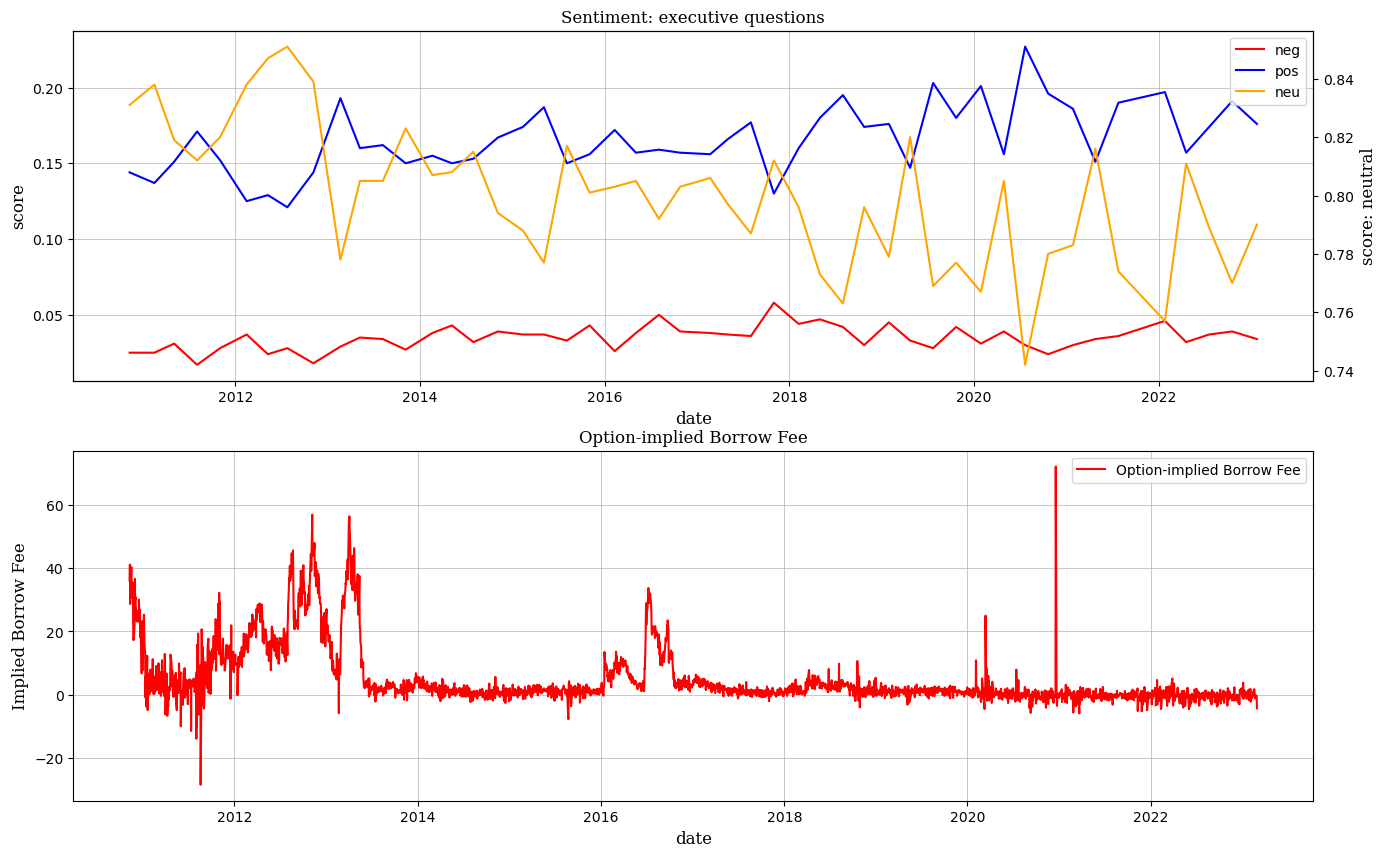

In [19]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2]) = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))

lns1=\
ax1.plot(data_call_executive_answer['call_datetime'],\
         data_call_executive_answer['executive_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_executive_answer['call_datetime'],\
         data_call_executive_answer['executive_pos'], label='pos', color='b')

ax1.set_title("Sentiment: executive questions", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_executive_answer['call_datetime'],\
               data_call_executive_answer['executive_neu'], label='neu', color='orange')
ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax2.plot(impliedborrowfee['date'],\
         impliedborrowfee['impliedfee'], label='Option-implied Borrow Fee', color='r')

ax2.set_title("Option-implied Borrow Fee", **csfont, size = sizetext)
ax2.set_ylabel('Implied Borrow Fee', size = sizetext, **csfont)
ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.grid(linewidth=0.5)
ax2.legend()

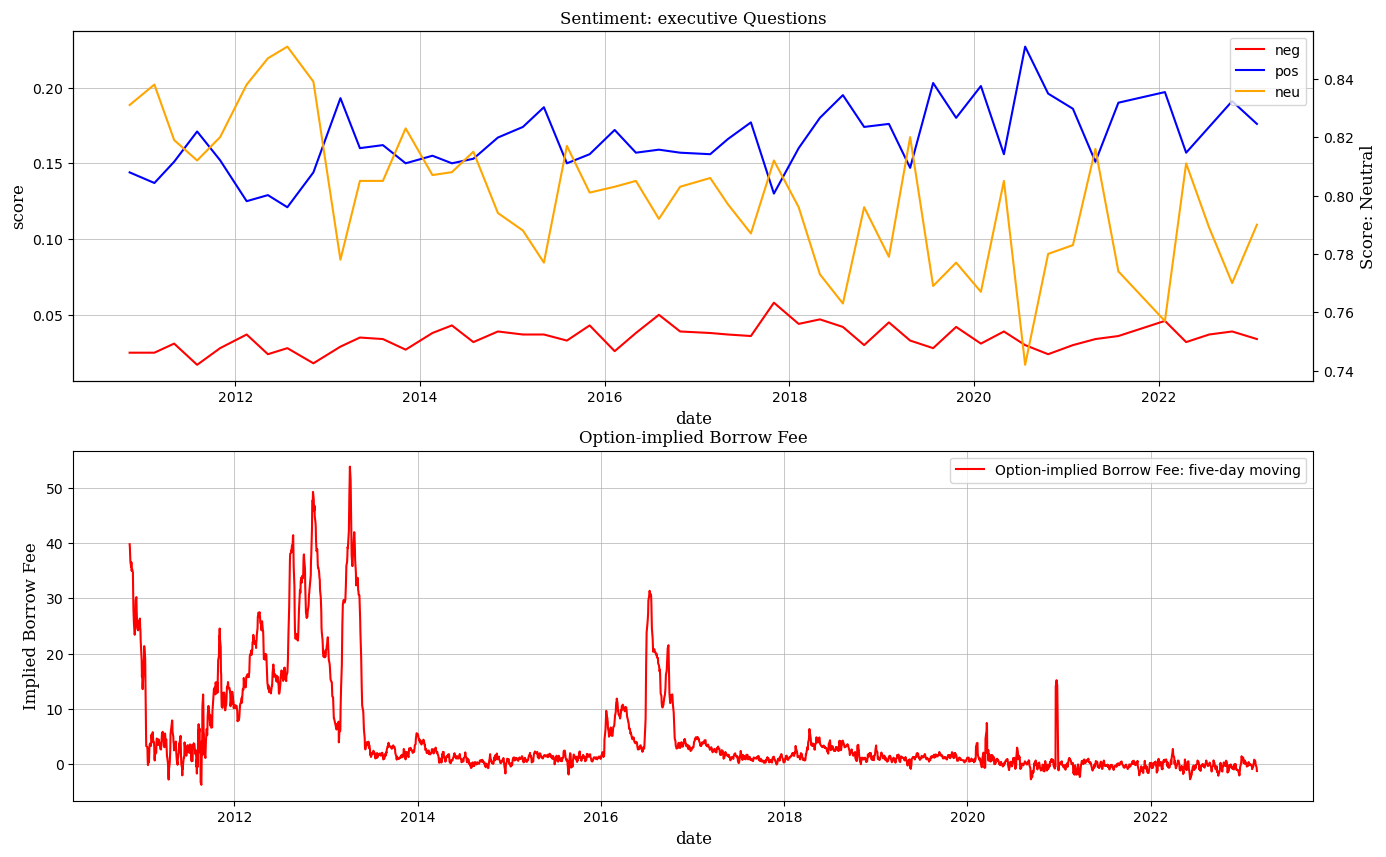

In [20]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2]) = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))

lns1=\
ax1.plot(data_call_executive_answer['call_datetime'],\
         data_call_executive_answer['executive_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_executive_answer['call_datetime'],\
         data_call_executive_answer['executive_pos'], label='pos', color='b')

ax1.set_title("Sentiment: executive Questions", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_executive_answer['call_datetime'],\
               data_call_executive_answer['executive_neu'], label='neu', color='orange')
ax11.set_ylabel('Score: Neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax2.plot(impliedborrowfee['date'],\
         impliedborrowfee['impliedfeefivedaymoving'], label='Option-implied Borrow Fee: five-day moving', color='r')

ax2.set_title("Option-implied Borrow Fee", **csfont, size = sizetext)
ax2.set_ylabel('Implied Borrow Fee', size = sizetext, **csfont)
ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.grid(linewidth=0.5)
ax2.legend()

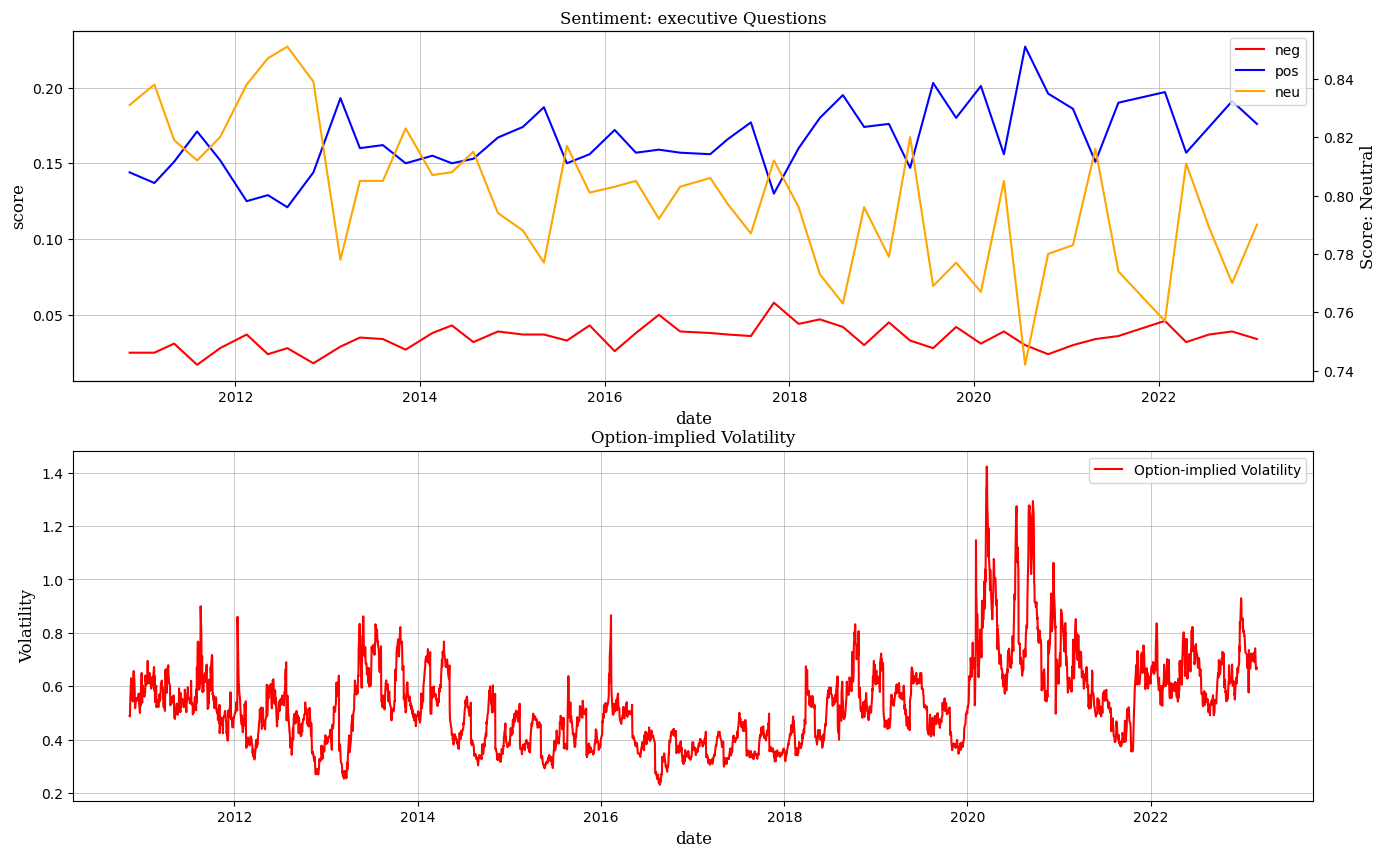

In [21]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2]) = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))

lns1=\
ax1.plot(data_call_executive_answer['call_datetime'],\
         data_call_executive_answer['executive_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_executive_answer['call_datetime'],\
         data_call_executive_answer['executive_pos'], label='pos', color='b')

ax1.set_title("Sentiment: executive Questions", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_executive_answer['call_datetime'],\
               data_call_executive_answer['executive_neu'], label='neu', color='orange')
ax11.set_ylabel('Score: Neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax2.plot(impliedborrowfee['date'],\
         impliedborrowfee['impl_volatility_call'],
         label='Option-implied Volatility',
         color='r')

ax2.set_title("Option-implied Volatility", **csfont, size = sizetext)
ax2.set_ylabel('Volatility', size = sizetext, **csfont)
ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.grid(linewidth=0.5)
ax2.legend()